In [3]:
import argopandas as argo
import seaborn as sns
sns.set(style='ticks', context='paper', palette='colorblind')

# canadian float with suspected fsd
flt = argo.float(4902573)

In [4]:
# get profiles near last profile (100km radius) in 2022
# note 2 aoml profiles look awful (PSAL ~31) so I am removing them
# they're the first two profiles so that's what .iloc[2:] is doing
ix = argo.prof.subset_radius(
    flt.prof.iloc[-1].latitude,
    flt.prof.iloc[-1].longitude,
    100
).subset_date('2022-01').iloc[2:]
ix

,file,date,latitude,longitude,ocean,profiler_type,institution,date_update
631306,aoml/4903258/profiles/R4903258_186.nc,2022-01-21 00:52:04+00:00,40.295,-61.588,A,854,AO,2022-01-31 06:00:46+00:00
2579685,meds/4902519/profiles/R4902519_011.nc,2022-01-09 06:29:00+00:00,40.257,-61.486,A,844,ME,2022-01-10 09:38:09+00:00
2579686,meds/4902519/profiles/R4902519_012.nc,2022-01-19 11:27:00+00:00,40.577,-62.339,A,844,ME,2022-01-19 10:16:08+00:00
2579687,meds/4902519/profiles/R4902519_013.nc,2022-01-29 16:32:00+00:00,40.407,-60.757,A,844,ME,2022-01-29 13:15:46+00:00
2581078,meds/4902573/profiles/R4902573_005.nc,2022-01-28 01:55:00+00:00,40.647,-61.348,A,844,ME,2022-01-28 04:15:57+00:00


In [5]:
df = ix.levels[['PRES', 'TEMP', 'PSAL']]

Reading 5 files


In [6]:
df

PRES       TEMP  \
file                                  N_PROF N_LEVELS                           
aoml/4903258/profiles/R4903258_186.nc 0      0            1.000000  22.298000   
                                             1            2.000000  22.319000   
                                             2            2.960000  22.320999   
                                             3            4.000000  22.315001   
                                             4            5.000000  22.313000   
...                                                            ...        ...   
meds/4902573/profiles/R4902573_005.nc 0      658       1955.400024   3.651000   
                                             659       1965.500000   3.643000   
                                             660       1975.500000   3.639000   
                                             661       1985.199951   3.633000   
                                             662       1994.599976   3.612000   

                                                            PSAL  
file                                  N_PROF N_LEVELS             
aoml/4903258/profiles/R4903258_186.nc 0      0         36.641998  
                                             1         36.639999  
                                             2         36.640999  
                                             3         36.640999  
                                             4         36.641998  
...                                                          ...  
meds/4902573/profiles/R4902573_005.nc 0      658       34.862000  
                                             659       34.862000  
                                             660       34.862000  
                                             661       34.862000  
                                             662       34.861000  

[4618 rows x 3 columns]

<AxesSubplot:xlabel='PSAL', ylabel='TEMP'>

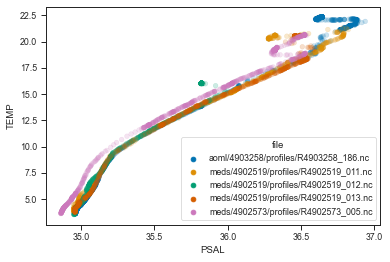

In [7]:
# plot
sns.scatterplot(x='PSAL', y='TEMP', hue='file', data=df, edgecolor=None, alpha=0.2)

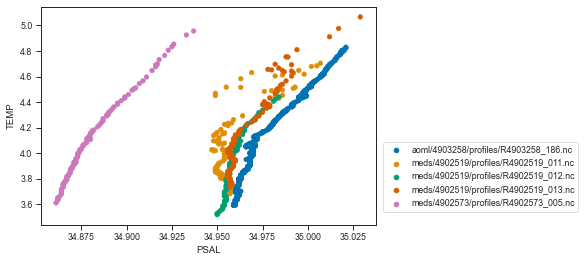

In [8]:
# plot again but focus on deep values
g = sns.scatterplot(x='PSAL', y='TEMP', hue='file', data=df[df.PRES > 1000], edgecolor=None)
# legend in the way, move it
g.legend(bbox_to_anchor = (1.01, 0.4))

Reading 6 files


<AxesSubplot:xlabel='PSAL', ylabel='TEMP'>

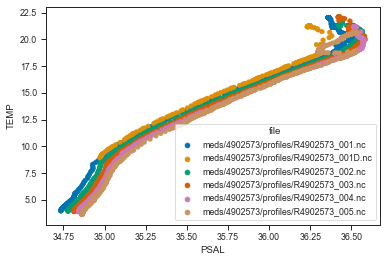

In [10]:
# note - this is actually the saltiest profile from this float, and it is still fresh relative to nearby profiles
# excuse the mismatched color schemes - but the above pink profile is the same as the below brown profiles (cycle 005)
sns.scatterplot(x='PSAL', y='TEMP', hue='file', data=flt.prof.levels[['PRES', 'TEMP', 'PSAL']], edgecolor=None)